In [15]:
import sys
sys.path.insert(0,'../')
import os
#run on cpu to not interfere with trianing
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
from net.hourglass import HourglassNet
from eval.heatmap_process import post_process_heatmap
import glob
import cv2
import matplotlib.pyplot as plt
import scipy
import imageio
from top.demo import render_joints
import numpy as np
from imgaug import augmenters as iaa



In [21]:
def normalize(imgdata, color_mean):
    '''
    :param imgdata: image in 0 ~ 255
    :return:  image from 0.0 to 1.0
    '''
    imgdata = imgdata/255.0

    for i in range(imgdata.shape[-1]):
        imgdata[:, :, i] -= color_mean[i]

    return imgdata

def inference_rgb(net, rgbdata, orgshape, mean=None):

    scale = (orgshape[0] * 1.0 / inres[0], orgshape[1] * 1.0 / inres[1])
    img_scale = iaa.Scale({"height": inres[0], "width": inres[1]})

    imgdata = img_scale.augment_image(rgbdata)

    mean = np.array([0.4404, 0.4440, 0.4327], dtype=np.float)

    imgdata = normalize(imgdata, mean)

    input = imgdata[np.newaxis, :, :, :]

    out = net.model.predict(input)
    return out[-1], scale

def inference_file(imgfile, net):
    imgdata = imageio.imread(imgfile)
    ret = inference_rgb(net,imgdata, imgdata.shape)
    return ret

In [28]:
num_class=14
num_stack=2
model_dir="../../trained_models/lspet"
model_json="net_arch.json"
epoch=47
model_weights="weights_epoch"+str(epoch)+".h5"
inres=(256, 256)
outres=(64,64)
xnet = HourglassNet(num_class, num_stack, inres, outres)
model_json=os.path.join(model_dir, model_json)
model_weights=os.path.join(model_dir, model_weights)

xnet.load_model(model_json, model_weights)



lspet_0.jpg
93.01106056010515
57.80098490534725
(105, 157, 3)
0.029044826


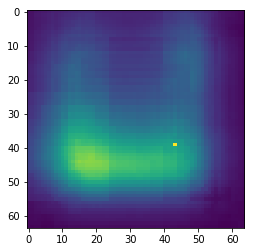

0.03424331


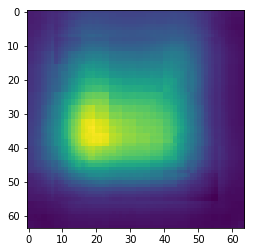

0.033632237


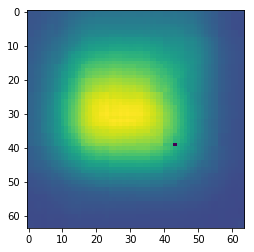

0.028357763


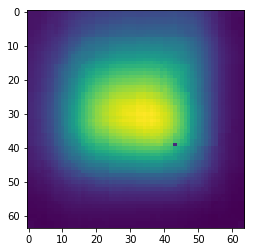

0.032709103


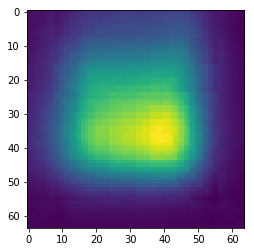

0.028492376


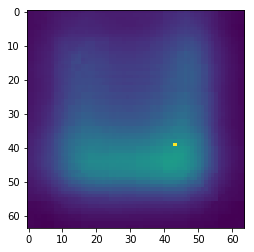

0.03232992


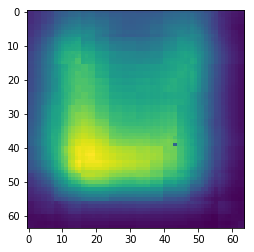

0.024729135


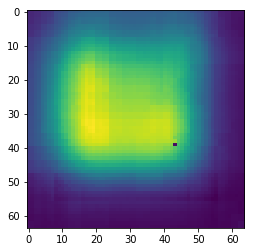

0.035885874


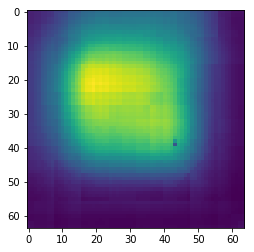

0.02427388


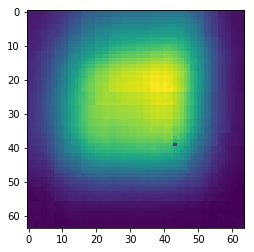

0.026360914


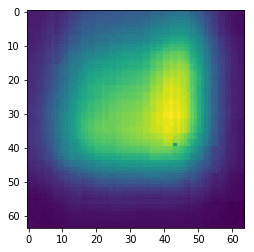

0.026130468


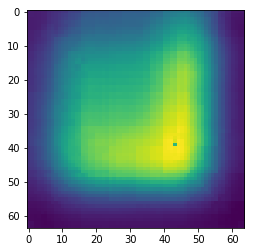

0.030478816


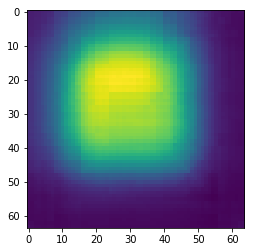

0.034756232


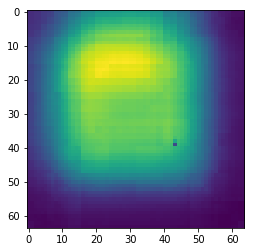

[(105.484375, 63.984375, 0.07664523), (46.609375, 55.78125, 0.08882001), (71.140625, 49.21875, 0.09573889), (83.40625, 49.21875, 0.102798395), (93.21875, 59.0625, 0.0970503), (105.484375, 63.984375, 0.11668552), (44.15625, 68.90625, 0.062062867), (46.609375, 55.78125, 0.06339297), (46.609375, 34.453125, 0.08085707), (98.125, 37.734375, 0.07899478), (103.03125, 49.21875, 0.07517006), (107.9375, 67.265625, 0.06547456), (71.140625, 31.171875, 0.0785074), (61.328125, 24.609375, 0.06914121)]


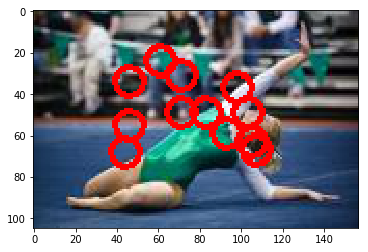

yoga2.jpg
225.56774039498413
68.86386516674897
(349, 620, 3)
0.02857602


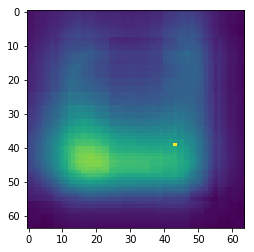

0.03314176


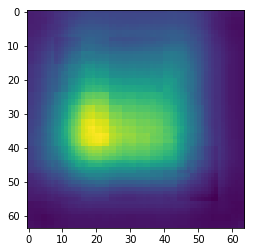

0.032328226


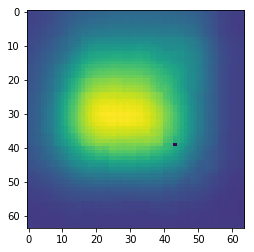

0.027256072


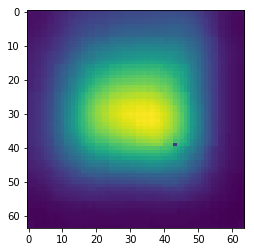

0.031952202


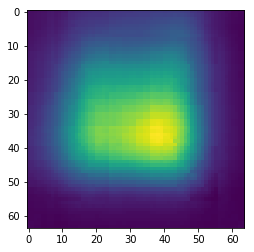

0.028077273


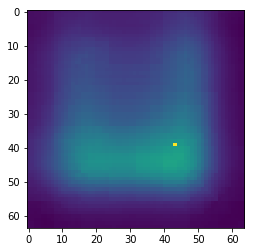

0.031740066


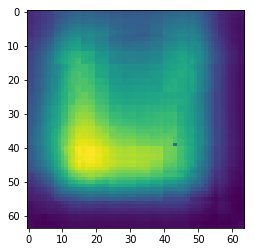

0.023946004


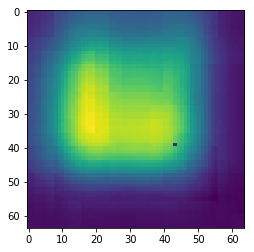

0.034925155


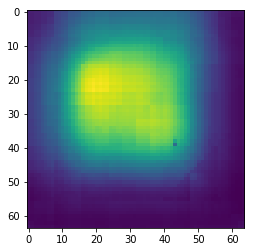

0.023403898


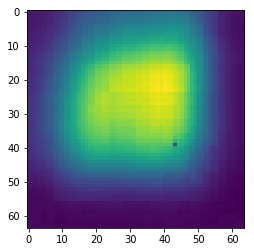

0.025985112


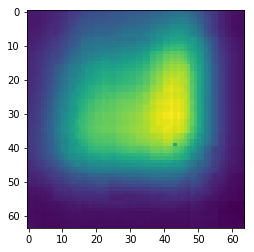

0.025857292


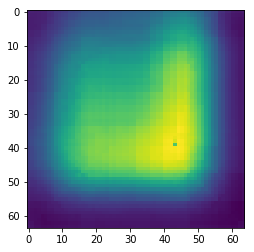

0.02959666


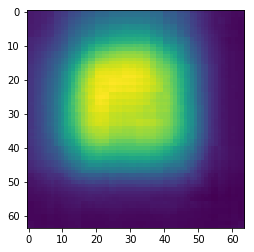

0.034192767


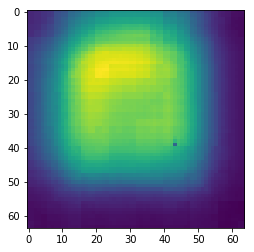

[(416.5625, 212.671875, 0.075690195), (203.4375, 196.3125, 0.08905191), (242.1875, 163.59375, 0.093939446), (348.75, 174.5, 0.10097554), (368.125, 196.3125, 0.09717381), (416.5625, 212.671875, 0.11040602), (184.0625, 229.03125, 0.06202322), (184.0625, 185.40625, 0.064272374), (184.0625, 114.515625, 0.07854539), (387.5, 125.421875, 0.07818331), (406.875, 163.59375, 0.0750183), (426.25, 223.578125, 0.06505382), (242.1875, 114.515625, 0.07592666), (213.125, 92.703125, 0.06873916)]


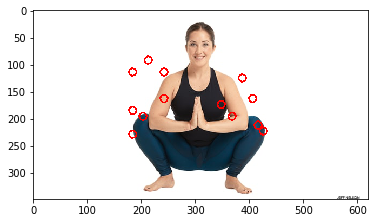

yoga1.jpg
223.3097242455775
67.61428026223514
(620, 620, 3)
0.028630711


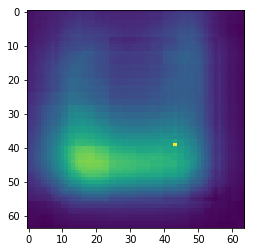

0.033261523


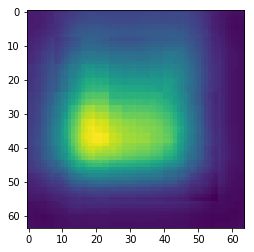

0.032364704


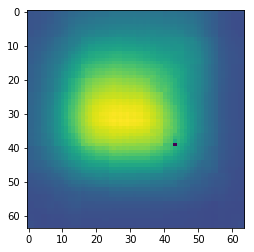

0.027296044


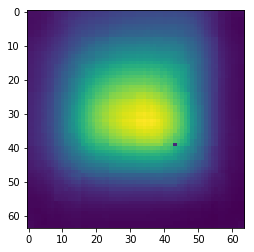

0.03190674


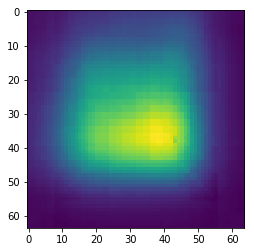

0.028094906


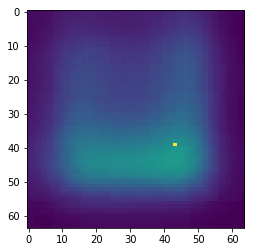

0.031856924


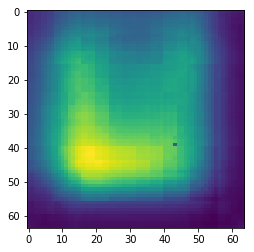

0.024034237


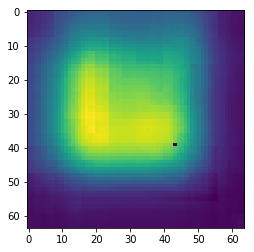

0.034939945


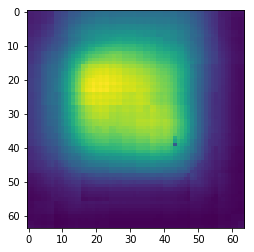

0.023461107


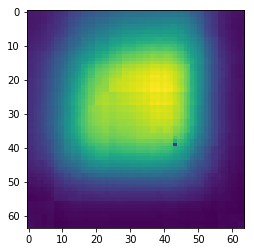

0.02600148


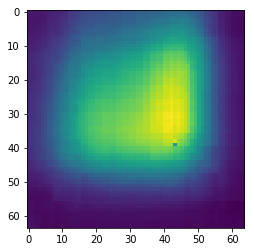

0.025897346


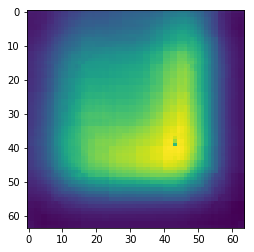

0.02955288


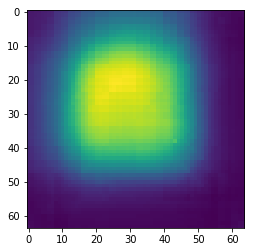

0.034125194


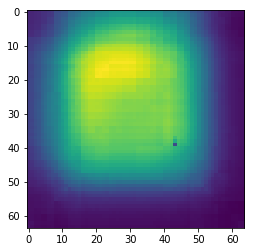

[(416.5625, 377.8125, 0.07816892), (203.4375, 348.75, 0.087758794), (280.9375, 310.0, 0.09431276), (329.375, 310.0, 0.10257957), (368.125, 348.75, 0.09789238), (416.5625, 377.8125, 0.11751535), (174.375, 406.875, 0.06350735), (184.0625, 329.375, 0.06288617), (184.0625, 222.8125, 0.07806252), (368.125, 222.8125, 0.077362545), (406.875, 300.3125, 0.07499358), (426.25, 397.1875, 0.066032745), (242.1875, 203.4375, 0.0768028), (213.125, 164.6875, 0.068175055)]


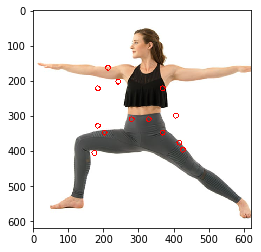

mpii_0.jpg
124.72486183449074
56.73201915317223
(720, 1280, 3)
0.02876483


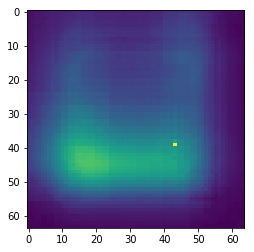

0.03371968


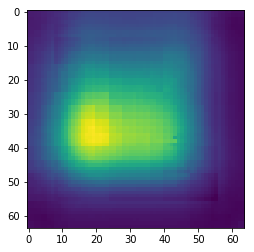

0.03303427


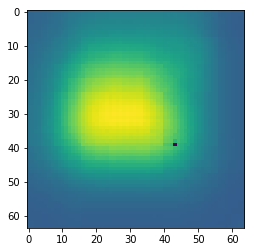

0.027950106


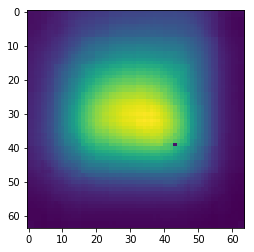

0.03225434


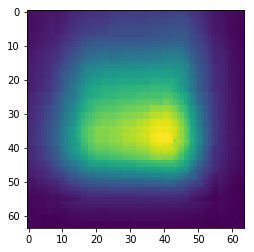

0.02822079


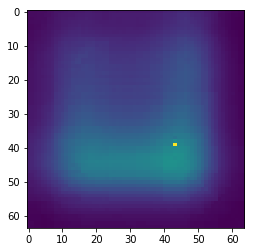

0.032034267


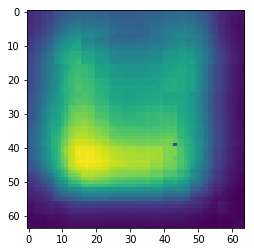

0.024565162


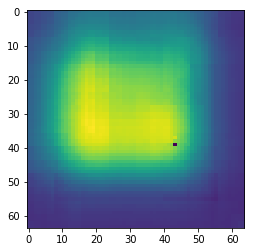

0.035439413


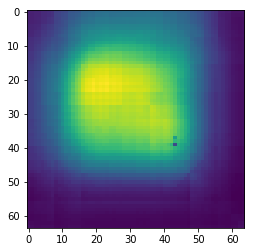

0.02407163


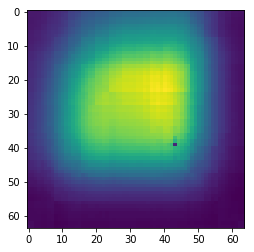

0.026175182


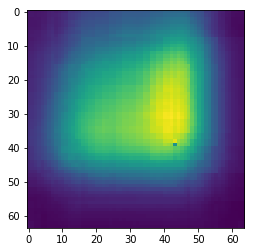

0.02600281


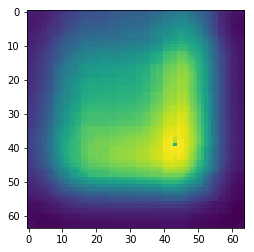

0.029957611


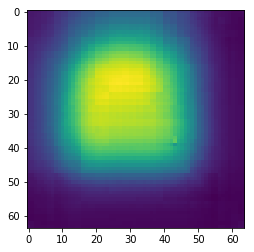

0.03440044


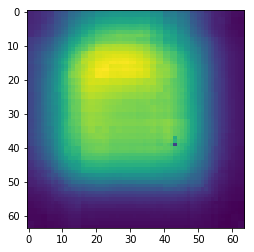

[(860.0, 438.75, 0.083403595), (380.0, 382.5, 0.08770426), (540.0, 337.5, 0.09575478), (720.0, 360.0, 0.10355595), (800.0, 405.0, 0.097541526), (860.0, 438.75, 0.1238214), (300.0, 495.0, 0.06186559), (380.0, 382.5, 0.06285648), (460.0, 236.25, 0.07852106), (800.0, 258.75, 0.07892077), (840.0, 348.75, 0.07586298), (880.0, 461.25, 0.06596428), (540.0, 236.25, 0.07738506), (440.0, 191.25, 0.068085484)]


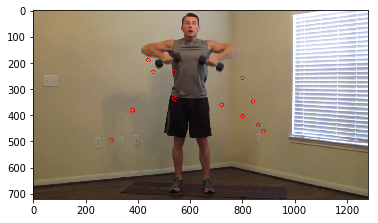

sample.jpg
213.44889960562415
60.10317170430969
(1440, 1080, 3)
0.02877537


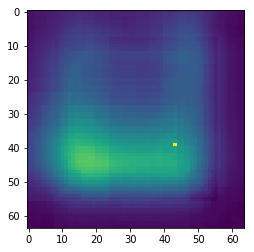

0.033367544


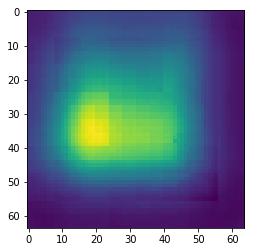

0.032417167


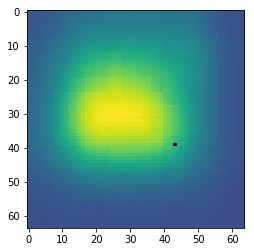

0.027283583


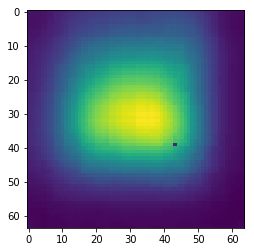

0.0320011


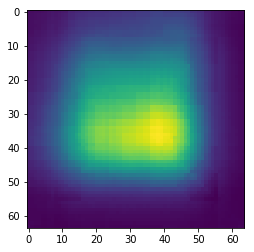

0.028320285


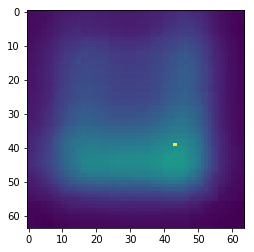

0.031935304


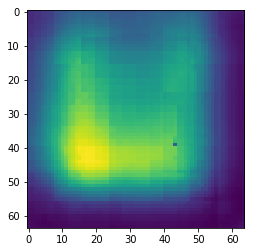

0.024077006


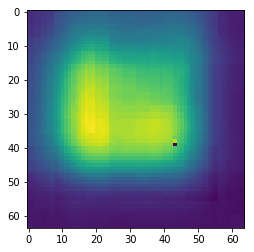

0.03494364


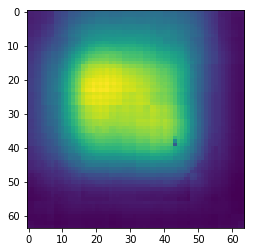

0.023362957


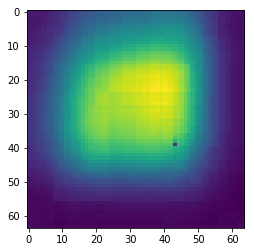

0.025999099


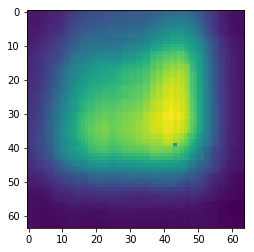

0.025942475


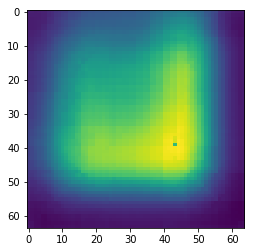

0.029505868


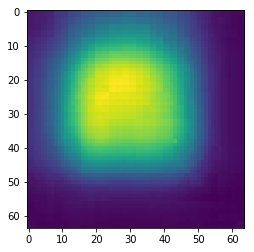

0.034053933


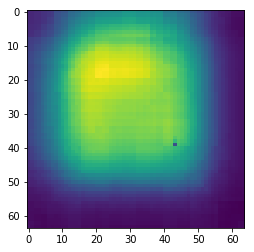

[(725.625, 877.5, 0.08068062), (320.625, 765.0, 0.0883952), (421.875, 675.0, 0.094838895), (607.5, 720.0, 0.10293895), (641.25, 810.0, 0.09782343), (725.625, 877.5, 0.118028715), (286.875, 990.0, 0.06271686), (320.625, 765.0, 0.06520794), (320.625, 517.5, 0.078577295), (641.25, 517.5, 0.077829085), (708.75, 697.5, 0.07467188), (742.5, 922.5, 0.06571095), (421.875, 472.5, 0.07776792), (354.375, 405.0, 0.0674782)]


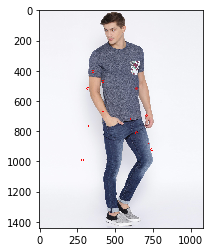

In [29]:
img_dir="../../data/test_images"

for file in os.listdir(img_dir):
    print(file)
    img_file=os.path.join(img_dir,file)
    image_data=imageio.imread(img_file)
    out,scale = inference_file(img_file,xnet)

    kps = post_process_heatmap(out[0,:,:,:])
    #first element of batch
    out=out[0]
    print(np.mean(image_data))
    print(np.std(image_data))
    print(np.shape(image_data))
    for j in range(out.shape[-1]):
        print(np.mean(out[:,:,j]))
        plt.imshow(out[:,:,j])
        plt.show()
    mkps = list() 
    for i, _kp in enumerate(kps):
        _conf = _kp[2]
        mkps.append((_kp[0]*scale[1]*4, _kp[1]*scale[0]*4, _conf))
    print(mkps)
    #normally conf th is around 0.2 but currently no joints are found
    cvmat = render_joints(imageio.imread(img_file), mkps, conf_th=0.02)
    plt.imshow(cvmat)
    plt.show()
